<a href="https://colab.research.google.com/github/Abdul-Subhan24/Supermart-Grocery-Sales---Retail-Analytics-Dataset./blob/main/Supermart_Grocery_Sales_Retail_Analytics_Dataset_csv_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [2]:
# Display the first few rows and basic info
print(df.head())
print(df.shape)
print(df.info())
print(df.isnull().sum())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  
(9994, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------    

In [3]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)

In [4]:

# Drop unnecessary columns
df.drop(['Order ID', 'Customer Name', 'State'], axis=1, inplace=True)

In [5]:
# Outlier Removal
df = df[df['Profit'] != 2000]  # Remove outlier from Profit
df = df[df['Discount'] != 200]  # Remove outlier from Discount
df = df[df['Sales'] != 1000]    # Remove outlier from Sales

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


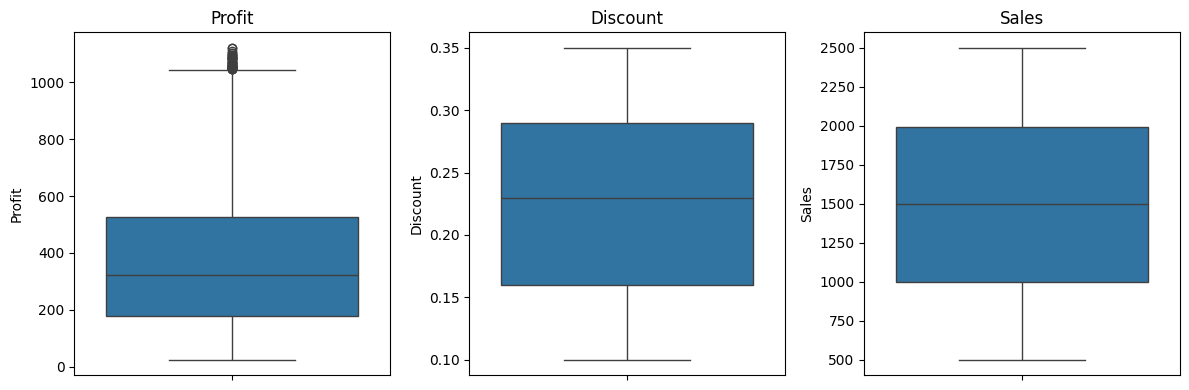

In [6]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(df['Profit']).set_title('Profit')
plt.subplot(1, 3, 2)
sns.boxplot(df['Discount']).set_title('Discount')
plt.subplot(1, 3, 3)
sns.boxplot(df['Sales']).set_title('Sales')
plt.tight_layout()
plt.show()

In [7]:
# Normalization
scaler = MinMaxScaler()
df[['Sales', 'Discount', 'Profit']] = scaler.fit_transform(df[['Sales', 'Discount', 'Profit']])

In [8]:
# Categorical Encoding using One-Hot Encoding
df = pd.get_dummies(df, columns=['Category', 'Sub Category', 'City', 'Region'], drop_first=True)

In [9]:
# Feature Engineering: Extracting Year, Month, and Day of Week
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

Available columns: ['Order Date', 'Sales', 'Discount', 'Profit', 'Category_Beverages', 'Category_Eggs, Meat & Fish', 'Category_Food Grains', 'Category_Fruits & Veggies', 'Category_Oil & Masala', 'Category_Snacks', 'Sub Category_Biscuits', 'Sub Category_Breads & Buns', 'Sub Category_Cakes', 'Sub Category_Chicken', 'Sub Category_Chocolates', 'Sub Category_Cookies', 'Sub Category_Dals & Pulses', 'Sub Category_Edible Oil & Ghee', 'Sub Category_Eggs', 'Sub Category_Fish', 'Sub Category_Fresh Fruits', 'Sub Category_Fresh Vegetables', 'Sub Category_Health Drinks', 'Sub Category_Masalas', 'Sub Category_Mutton', 'Sub Category_Noodles', 'Sub Category_Organic Fruits', 'Sub Category_Organic Staples', 'Sub Category_Organic Vegetables', 'Sub Category_Rice', 'Sub Category_Soft Drinks', 'Sub Category_Spices', 'City_Chennai', 'City_Coimbatore', 'City_Cumbum', 'City_Dharmapuri', 'City_Dindigul', 'City_Kanyakumari', 'City_Karur', 'City_Krishnagiri', 'City_Madurai', 'City_Nagercoil', 'City_Namakkal', 'Cit

<ipython-input-10-44869c3f654b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Category', data=sales_by_category, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

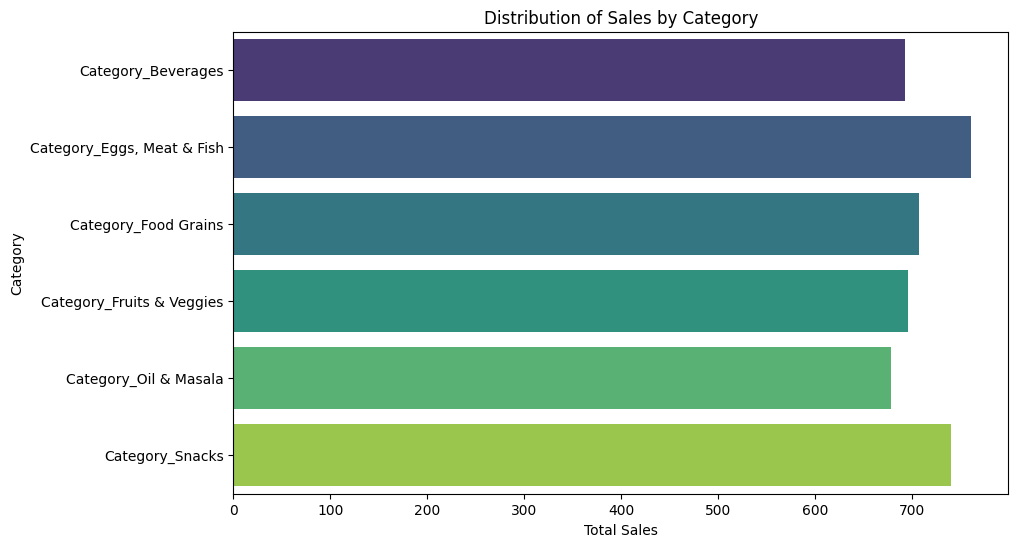

In [10]:
# Check the available columns
print("Available columns:", df.columns.tolist())

# Create a list of category columns
category_columns = [col for col in df.columns if col.startswith('Category_')]

# Sum sales for each category column
sales_by_category = df[category_columns].multiply(df['Sales'], axis=0).sum().reset_index()

# Rename the columns for clarity
sales_by_category.columns = ['Category', 'Total Sales']

# Check the sales_by_category DataFrame
print(sales_by_category)

# Proceed with plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Sales', y='Category', data=sales_by_category, palette='viridis')
plt.title('Distribution of Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()


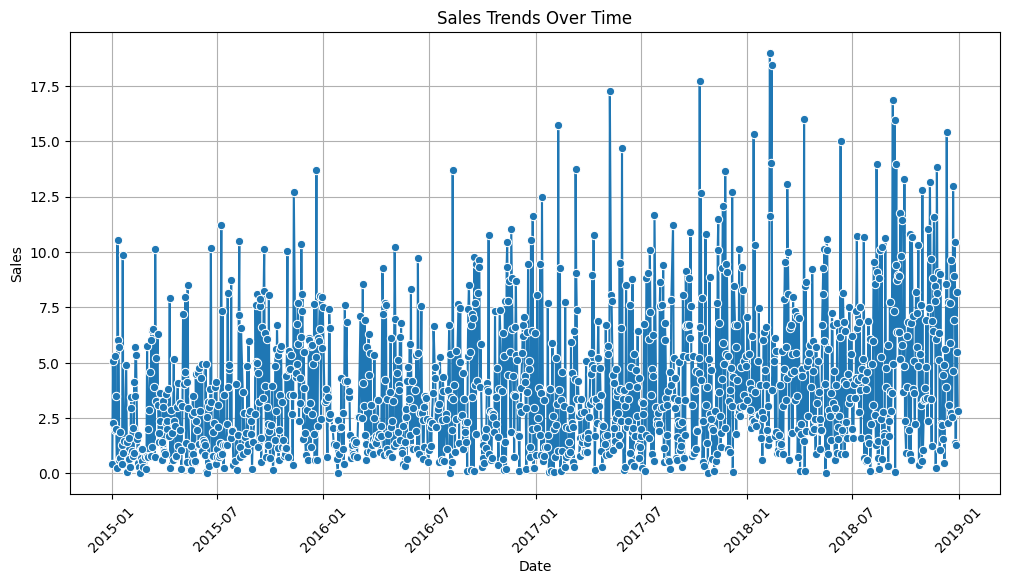

In [11]:
# 2. Sales Trends Over Time
df_time = df.groupby('Order Date').sum()['Sales'].reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='Order Date', y='Sales', marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

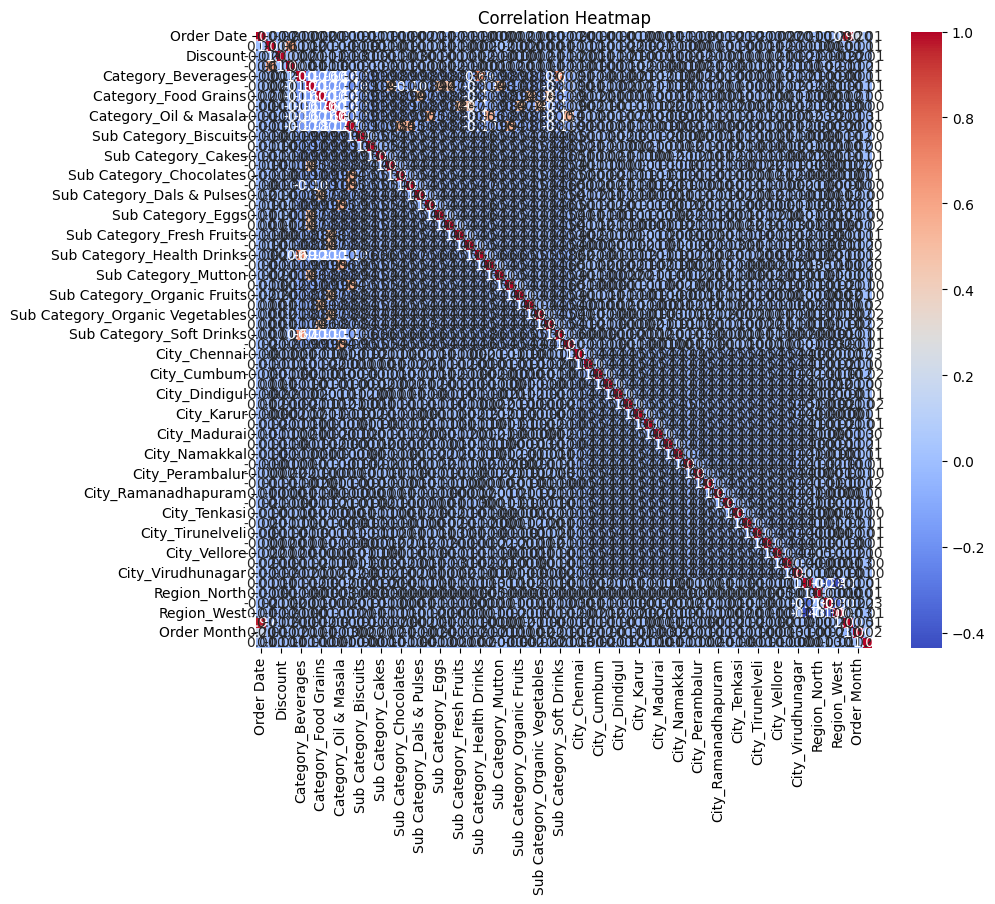

In [12]:
# 3. Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Machine Learning

# Features and target variable
X = df.drop(['Profit', 'Order Date'], axis=1)  # Drop target variable and any non-numeric columns
y = df['Profit']

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Normalize features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [16]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_normalized, y_train)

LinearRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test_normalized)

In [18]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.03061802517163523
R-squared: 0.35012994618153637


In [20]:


# If you want to predict a specific category, choose one of the binary columns
# For instance, let's predict if a sale belongs to 'Category_Beverages' or not
df['Category_Beverages'] = df['Category_Beverages'].astype(int)  # Ensure it is in int format
y = df['Category_Beverages']  # Target variable (you can choose any other category column)

# Define features
X = df.drop(category_columns + ['Sales', 'Order Date'], axis=1)  # Drop categorical columns and others not needed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1700
           1       1.00      1.00      1.00       298

    accuracy                           1.00      1998
   macro avg       1.00      1.00      1.00      1998
weighted avg       1.00      1.00      1.00      1998

Confusion Matrix:
 [[1700    0]
 [   0  298]]


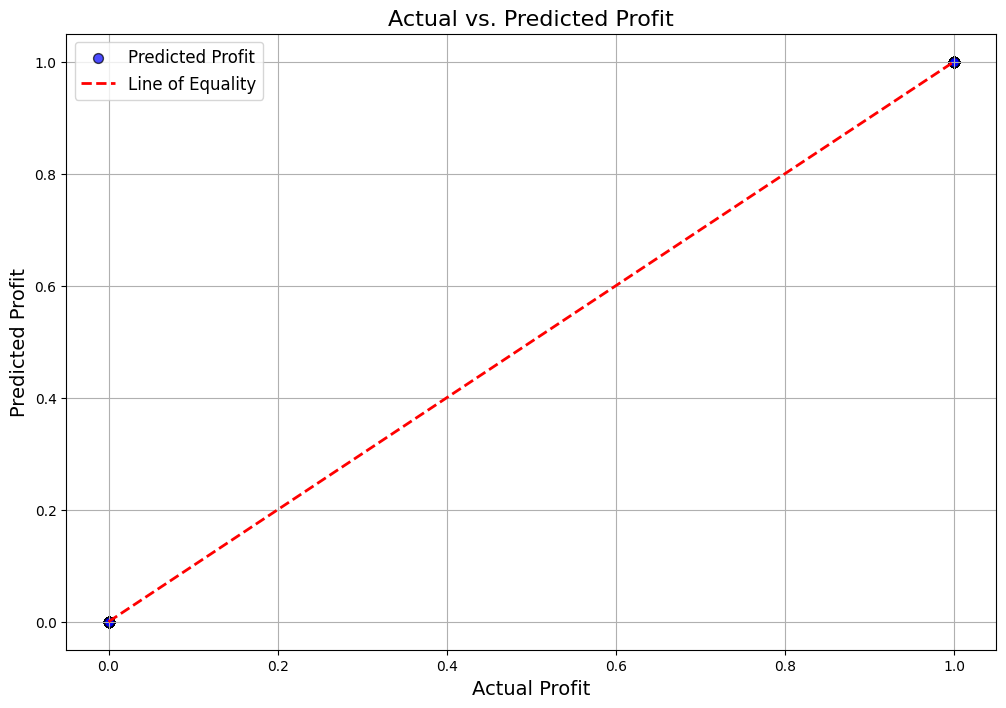

In [21]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual profits and y_pred contains the predicted profits
plt.figure(figsize=(12, 8))

# Scatter plot for actual vs. predicted profits
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k', s=50, label='Predicted Profit')

# Line of equality (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Line of Equality')

# Labels and title
plt.xlabel('Actual Profit', fontsize=14)
plt.ylabel('Predicted Profit', fontsize=14)
plt.title('Actual vs. Predicted Profit', fontsize=16)
plt.grid(True)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


In [22]:
# Yearly Sales Calculation
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

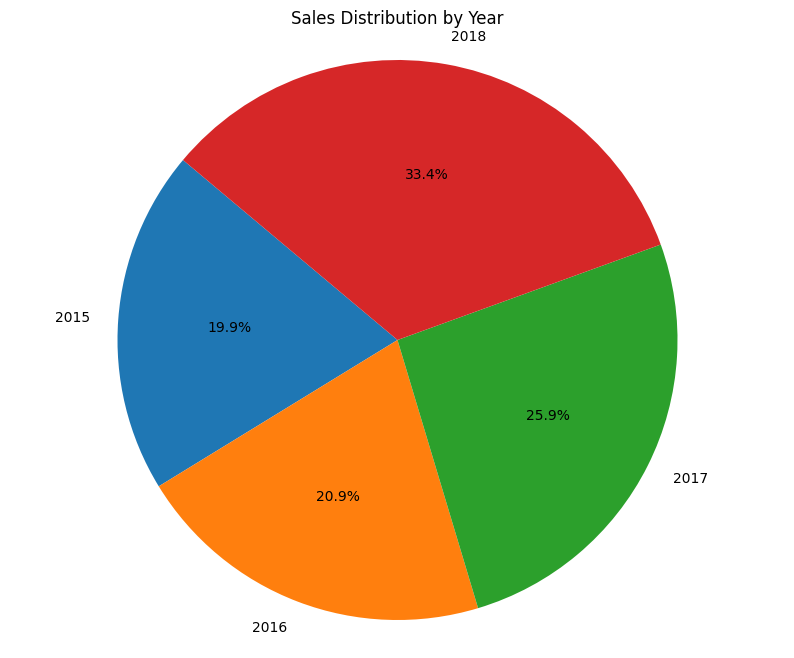

In [23]:
# Creating a pie chart for sales by year
plt.figure(figsize=(10, 8))
plt.pie(yearly_sales['Sales'], labels=yearly_sales['Year'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Year')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()